In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Vision por Computador/Semana9/Mushrooms classification/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
for i in df.columns.tolist():
  print(df.groupby(str(i)).size())

class
e    4208
p    3916
dtype: int64
cap-shape
b     452
c       4
f    3152
k     828
s      32
x    3656
dtype: int64
cap-surface
f    2320
g       4
s    2556
y    3244
dtype: int64
cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64
bruises
f    4748
t    3376
dtype: int64
odor
a     400
c     192
f    2160
l     400
m      36
n    3528
p     256
s     576
y     576
dtype: int64
gill-attachment
a     210
f    7914
dtype: int64
gill-spacing
c    6812
w    1312
dtype: int64
gill-size
b    5612
n    2512
dtype: int64
gill-color
b    1728
e      96
g     752
h     732
k     408
n    1048
o      64
p    1492
r      24
u     492
w    1202
y      86
dtype: int64
stalk-shape
e    3516
t    4608
dtype: int64
stalk-root
?    2480
b    3776
c     556
e    1120
r     192
dtype: int64
stalk-surface-above-ring
f     552
k    2372
s    5176
y      24
dtype: int64
stalk-surface-below-ring
f     600
k    2304
s    4936
y     2

In [ ]:
def categorizar(columna):
  dic={}
  x = list(dict(df.groupby(columna).size()).keys())
  for i in range(len(x)):
    dic[x[i]]=i
  df[columna] = df[columna].replace(dic)


In [ ]:
for i in df.columns.tolist():
  categorizar(i)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
X = df.drop('class', axis=1)  # Características
y = df['class']  # Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]


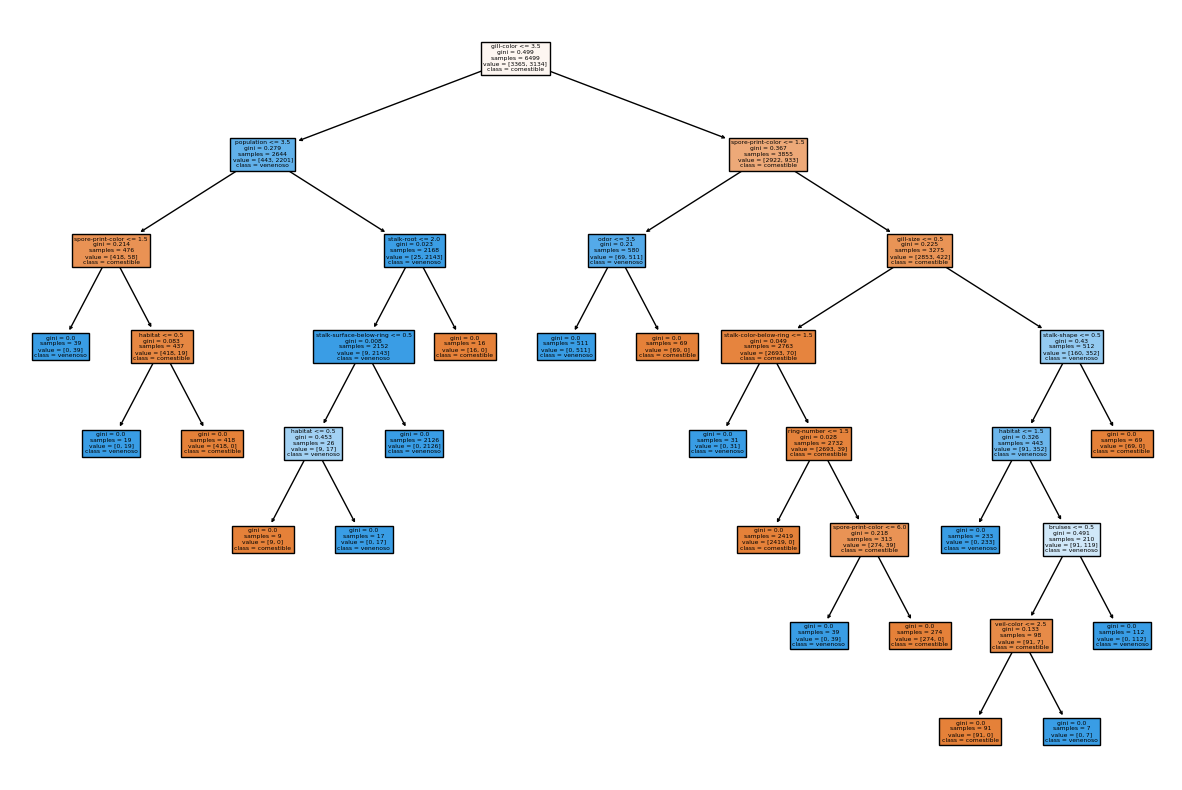

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['comestible', 'venenoso'], filled=True)
plt.show()